In [58]:
import random
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
import pandas as pd
import torch
import os

from scipy.stats import norm, skewnorm, gamma

In [2]:
seed = 633

print("[ Using Seed : ", seed, " ]")

torch.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
torch.cuda.manual_seed(seed)
numpy.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

[ Using Seed :  633  ]


In [3]:
import koopman_probabilistic
import model_objs
import vanilla_benchmark

In [4]:
def normal_pdf(mu, sigma, x):
    return np.exp(-(x - mu)**2 / (2 * sigma**2))/((2 * np.pi * sigma**2)**0.5)

# Gaussian with time-varying mean and variance

In [5]:
t_vec = np.arange(100000)
mu_vec = 2 * np.sin(1 + np.sin(2 * np.pi * t_vec / 48))
sigma_vec = np.exp(np.sin(2 * np.pi * t_vec / 31) - 1) + 0.5
x = np.random.normal(mu_vec, sigma_vec).reshape(-1, 1)

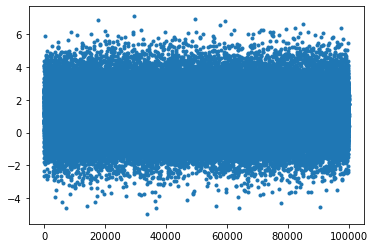

In [6]:
plt.plot(x, ".")

In [7]:
num_freqs = [2, 2]
num_fourier = 2
model = model_objs.NormalNLL(x_dim=x.shape[1], num_freqs=num_freqs, n=256)
k = koopman_probabilistic.KoopmanProb(model, device='cpu', sample_num=24, num_fourier_modes=num_fourier, batch_size=32)
k.find_fourier_omegas(x, hard_code=[48, 31])

tensor([0.1309, 0.2027])

In [8]:
k.fit(x, iterations=100, verbose=True, interval=20, cutoff=0, weight_decay=1e-7, lr_theta=1e-4, lr_omega=0, training_mask=None);

Iteration  0
tensor([48.0000, 31.0000, 48.0000, 31.0000])
Setting periods to tensor([48.0000, 31.0000, 48.0000, 31.0000], grad_fn=<MulBackward0>)
Loss:  1.4826022330678865
Iteration  1
tensor([48.0000, 31.0000, 48.0000, 31.0000])
Setting periods to tensor([48.0000, 31.0000, 48.0000, 31.0000], grad_fn=<MulBackward0>)
Loss:  0.7678132957580811
Iteration  2
tensor([48.0000, 31.0000, 48.0000, 31.0000])
Setting periods to tensor([48.0000, 31.0000, 48.0000, 31.0000], grad_fn=<MulBackward0>)
Loss:  0.5232024095018681
Iteration  3
tensor([48.0000, 31.0000, 48.0000, 31.0000])
Setting periods to tensor([48.0000, 31.0000, 48.0000, 31.0000], grad_fn=<MulBackward0>)
Loss:  0.4656219562290956
Iteration  4
tensor([48.0000, 31.0000, 48.0000, 31.0000])
Setting periods to tensor([48.0000, 31.0000, 48.0000, 31.0000], grad_fn=<MulBackward0>)
Loss:  0.46204202965118907
Iteration  5
tensor([48.0000, 31.0000, 48.0000, 31.0000])
Setting periods to tensor([48.0000, 31.0000, 48.0000, 31.0000], grad_fn=<MulBackw

Setting periods to tensor([48.0000, 31.0000, 48.0000, 31.0000], grad_fn=<MulBackward0>)
Loss:  0.4222240719496138
Iteration  48
tensor([48.0000, 31.0000, 48.0000, 31.0000])
Setting periods to tensor([48.0000, 31.0000, 48.0000, 31.0000], grad_fn=<MulBackward0>)
Loss:  0.42186791903131843
Iteration  49
tensor([48.0000, 31.0000, 48.0000, 31.0000])
Setting periods to tensor([48.0000, 31.0000, 48.0000, 31.0000], grad_fn=<MulBackward0>)
Loss:  0.42154848591566263
Iteration  50
tensor([48.0000, 31.0000, 48.0000, 31.0000])
Setting periods to tensor([48.0000, 31.0000, 48.0000, 31.0000], grad_fn=<MulBackward0>)
Loss:  0.4212725015829162
Iteration  51
tensor([48.0000, 31.0000, 48.0000, 31.0000])
Setting periods to tensor([48.0000, 31.0000, 48.0000, 31.0000], grad_fn=<MulBackward0>)
Loss:  0.42101891647641826
Iteration  52
tensor([48.0000, 31.0000, 48.0000, 31.0000])
Setting periods to tensor([48.0000, 31.0000, 48.0000, 31.0000], grad_fn=<MulBackward0>)
Loss:  0.42077519907349287
Iteration  53
ten

Setting periods to tensor([48.0000, 31.0000, 48.0000, 31.0000], grad_fn=<MulBackward0>)
Loss:  0.41848590134803737
Iteration  96
tensor([48.0000, 31.0000, 48.0000, 31.0000])
Setting periods to tensor([48.0000, 31.0000, 48.0000, 31.0000], grad_fn=<MulBackward0>)
Loss:  0.41847291013659743
Iteration  97
tensor([48.0000, 31.0000, 48.0000, 31.0000])
Setting periods to tensor([48.0000, 31.0000, 48.0000, 31.0000], grad_fn=<MulBackward0>)
Loss:  0.41845201505805407
Iteration  98
tensor([48.0000, 31.0000, 48.0000, 31.0000])
Setting periods to tensor([48.0000, 31.0000, 48.0000, 31.0000], grad_fn=<MulBackward0>)
Loss:  0.41843506732100766
Iteration  99
tensor([48.0000, 31.0000, 48.0000, 31.0000])
Setting periods to tensor([48.0000, 31.0000, 48.0000, 31.0000], grad_fn=<MulBackward0>)
Loss:  0.418436554905068
Final loss: 0.418436554905068


In [11]:
predict_through = 400
params = k.predict(predict_through)
mu_hat, sigma_hat = params

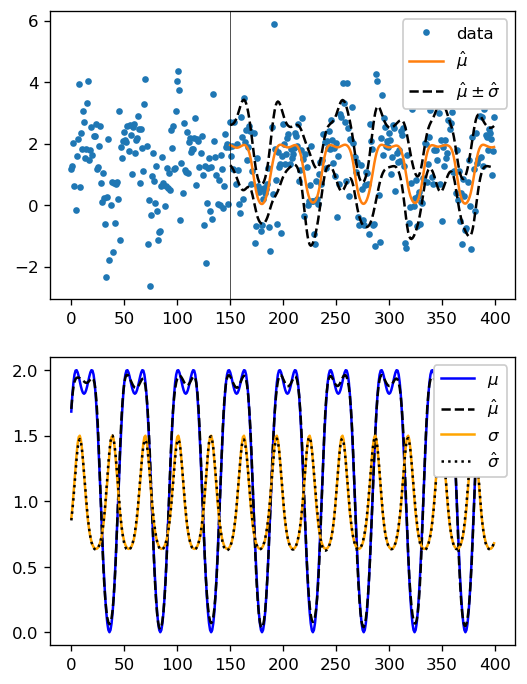

In [12]:
%matplotlib inline
plt.subplots(figsize=(5, 7), dpi=120)
idx = 150
plt.subplot(211)
pt = np.arange(predict_through)
plt.plot(x[:predict_through], ".", label="data")
plt.plot(pt[idx:], mu_hat[idx:], label="$\hat \mu$")
plt.plot(pt[idx:], mu_hat[idx:] + sigma_hat[idx:], "--k", label="$\hat \mu \pm \hat \sigma$")
plt.plot(pt[idx:], mu_hat[idx:] - sigma_hat[idx:], "--k")
plt.axvline(idx, color="k", linewidth=0.4)
plt.legend(loc="upper right", framealpha=1)
plt.subplot(212)
plt.plot(mu_vec[:predict_through], "b", label="$\mu$")
plt.plot(mu_hat, "--k", label="$\hat \mu$")
plt.plot(sigma_vec[:predict_through], "orange", label="$\sigma$")
plt.plot(sigma_hat, ":k", label="$\hat \sigma$")
plt.legend(loc="upper right", framealpha=1)


# Gamma with time varying parameters

In [242]:
t_vec = np.arange(100000)
periods = [96, 12]
a_vec = (np.exp(np.sin(2 * np.pi * t_vec / periods[0])) + np.cos(2 * np.pi * t_vec / periods[1])) ** 2 + 4
scale_vec = 0.5 * np.sin(2 * np.pi * t_vec / periods[1]) + np.cos(2 * np.pi * t_vec / periods[0]) + 2.5
x = np.random.gamma(a_vec, scale=scale_vec).reshape(-1, 1)

<IPython.core.display.Javascript object>


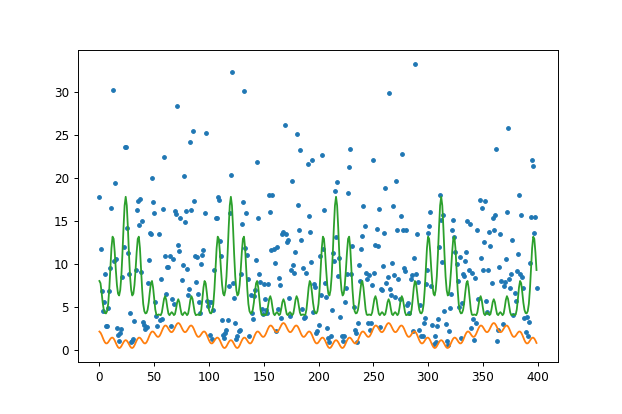

In [243]:
%matplotlib notebook
idx = 400
plt.plot(x[:idx], ".")
plt.plot(scale_vec[:idx])
plt.plot(a_vec[:idx])

In [188]:
num_freqs = [2, 2]
num_fourier = 2
model = model_objs.GammaNLL(x_dim=x.shape[1], num_freqs=num_freqs, n=256)
k = koopman_probabilistic.KoopmanProb(model, device='cpu', sample_num=24, num_fourier_modes=num_fourier, batch_size=32)
k.find_fourier_omegas(x, hard_code=periods)

tensor([0.0654, 0.5236])

In [199]:
k.fit(x, iterations=350, verbose=True, interval=20, cutoff=0, weight_decay=1e-7, lr_theta=1e-4, lr_omega=0, training_mask=None);

Iteration  0
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  3.1314006
Iteration  1
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  3.1313865
Iteration  2
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  3.1313763
Iteration  3
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  3.1313257
Iteration  4
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  3.1313412
Iteration  5
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  3.1313274
Iteration  6
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  3.1313019
Iteration  7
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96.,

Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  3.1304498
Iteration  63
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  3.1304731
Iteration  64
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  3.1304135
Iteration  65
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  3.1304362
Iteration  66
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  3.1304207
Iteration  67
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  3.1303787
Iteration  68
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss:  3.1303825
Iteration  69
tensor([96., 12., 96., 12.])
Setting periods to tensor([96., 12., 96., 12.], grad_fn=<MulBackward0>)
Loss

In [204]:
predict_through = 400
params = k.predict(predict_through)
rate_hat, a_hat = params
scale_hat = 1 / rate_hat

In [205]:
def gamma_quantiles(rate, a, quantiles):
    T = len(rate)
    quant_preds = np.zeros((T, len(quantiles)))
    for t in range(T):
        rv = gamma(a[t], scale=1/rate[t])
        for j, q in enumerate(quantiles):
            quant_preds[t, j] = rv.ppf(q)
    return quant_preds

In [206]:
quantiles = np.array([30, 60, 85, 98], dtype=np.float32) / 100
quant_preds = gamma_quantiles(rate_hat, a_hat, quantiles=quantiles)

In [207]:
mean_hat = model.mean(params)
std_hat = model.std(params)

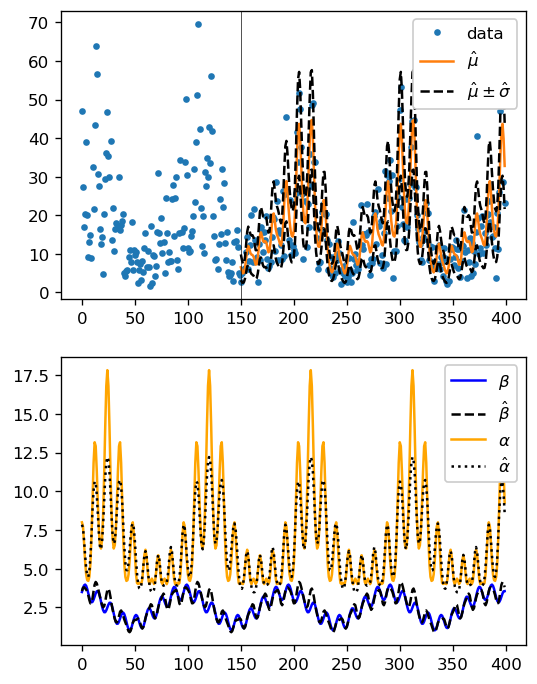

In [209]:
%matplotlib inline
plt.subplots(figsize=(5, 7), dpi=120)
idx = 150
plt.subplot(211)
pt = np.arange(predict_through)
plt.plot(x[:predict_through], ".", label="data")
# colors = [(i / len(quantiles), 0, 0) for i in range(len(quantiles))]
# for j in range(0, len(quantiles), 1):
#     plt.plot(pt[idx:], quant_preds[idx:, j], color=colors[j], linewidth=0.5, label=quantiles[j])
plt.plot(pt[idx:], mean_hat[idx:], label="$\hat \mu$")
plt.plot(pt[idx:], mean_hat[idx:] + std_hat[idx:], "--k", label="$\hat \mu \pm \hat \sigma$")
plt.plot(pt[idx:], mean_hat[idx:] - std_hat[idx:], "--k")
plt.axvline(idx, color="k", linewidth=0.4)
plt.legend(loc="upper right", framealpha=1)
plt.subplot(212)
plt.plot(scale_vec[:predict_through], "b", label="$\\beta$")
plt.plot(scale_hat, "--k", label="$\hat \\beta$")
plt.plot(a_vec[:predict_through], "orange", label="$\\alpha$")
plt.plot(a_hat, ":k", label="$\hat \\alpha$")
plt.legend(loc="upper right", framealpha=1)

# 3D plot

In [210]:
from mpl_toolkits.mplot3d import Axes3D

<IPython.core.display.Javascript object>


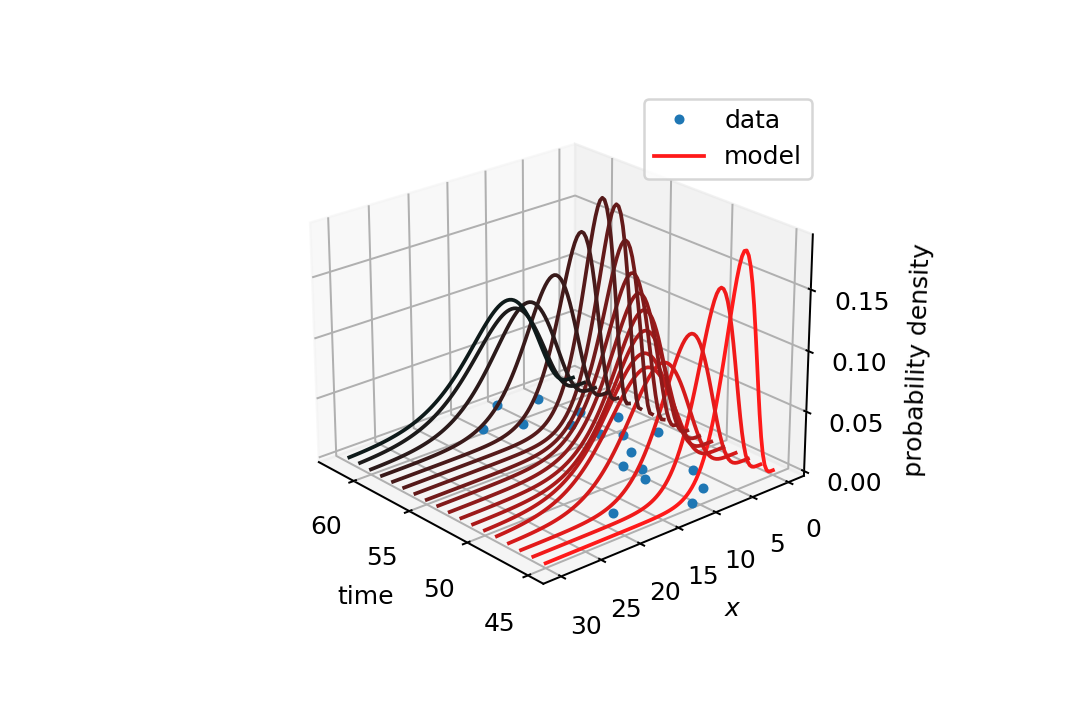

In [233]:
%matplotlib notebook
# (t, x, pdf)
start = 45
end = 63
step = 1
ts = np.arange(start, end, step)
xs = x[ts]
pdfs = []
fig = plt.figure(dpi=150)
ax = fig.gca(projection='3d')
ax.plot(ts, xs, np.zeros(len(xs)), ".")
for t in ts:
    lins = np.linspace(0, 30, 100)
    pdf = gamma.pdf(lins, a_hat[t], scale=scale_hat[t])
    pdfs.append(pdf)
    ax.plot(t * np.ones(len(lins)), lins, pdf, color=(((end - t) / (end - start)), 0.1, 0.1))
plt.xlabel("time")
plt.ylabel("$x$")
ax.set_zlabel("probability density")
plt.legend(["data", "model"])

In [218]:
plt.plot()

array([0.00000000e+00, 5.21101592e-08, 2.28998606e-06, 1.93478310e-05,
       8.32225402e-05, 2.47284842e-04, 5.81484449e-04, 1.16346819e-03,
       2.06844738e-03, 3.35995091e-03, 5.08274940e-03, 7.25849732e-03,
       9.88409693e-03, 1.29324423e-02, 1.63550206e-02, 2.00857895e-02,
       2.40457734e-02, 2.81478963e-02, 3.23016640e-02, 3.64174149e-02,
       4.04099535e-02, 4.42014672e-02, 4.77236954e-02, 5.09193742e-02,
       5.37430154e-02, 5.61611048e-02, 5.81518151e-02, 5.97043351e-02,
       6.08179128e-02, 6.15007021e-02, 6.17684940e-02, 6.16434003e-02,
       6.11525466e-02, 6.03268178e-02, 5.91996896e-02, 5.78061685e-02,
       5.61818548e-02, 5.43621353e-02, 5.23815063e-02, 5.02730238e-02,
       4.80678736e-02, 4.57950512e-02, 4.34811413e-02, 4.11501844e-02,
       3.88236180e-02, 3.65202824e-02, 3.42564763e-02, 3.20460555e-02,
       2.99005621e-02, 2.78293773e-02, 2.58398897e-02, 2.39376727e-02,
       2.21266659e-02, 2.04093551e-02, 1.87869491e-02, 1.72595489e-02,
      